- Importing the File
- Importing the Data Description to get the matabolism position and names. 
- Zooming to the metabolism position and find the peaks there, for every measurement step
- Plotting the Peaks and make interpolation
- Plotly configureation: manually set range

## Classes

In [53]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import polars as pl 

# script classes
from classes import *


In [54]:
loaddata = LoadData()

peakfinder = PeakFinder()


In [55]:

file = str(Path('FA_20231109_2H_yeast_Glucose-d2_5.ser.csv'))
substrates = loaddata.get_substrate_list(file)
metabolites = loaddata.get_metabolite_list(file)
df_list = loaddata.load_data(file)

Here are the x positions we have to look for peaks!

In [56]:
substrates, metabolites

([3.8, 4.7], [1.25, 2.0])

Zooming to the substrat and metabolism positions

In [57]:
df = pd.read_csv(df_list[0])
display(df.head())


def zoom(df, pos, width=0.5):

    start = pos - width
    end = pos + width
    df_zoom = df[(df.iloc[:, 0] >= start) & (df.iloc[:, 0] <= end)]
    return df_zoom
    
def get_peak_list(df, substrat, range=0.1):
    
    peak_list = []
    peak_df = pd.DataFrame()
    df_zoom = zoom(df, substrat, range).reset_index(drop=True)

    for col in df.columns[1:]:

        x = df_zoom.iloc[:, 0]
        y = df_zoom.loc[:, col]

        peaks, prob, tresh = peakfinder.peaks_finder(y)

        peaks = {'x': x[peaks].values, 
                'y': y[peaks].values}

        peak_df = pd.concat([peak_df, pd.DataFrame(peaks)], ignore_index=True)
        
    return peak_df

    

,Unnamed: 0,FA_20231109_2H_yeast_1.5.ser#1,FA_20231109_2H_yeast_1.5.ser#2,FA_20231109_2H_yeast_1.5.ser#3,FA_20231109_2H_yeast_1.5.ser#4,FA_20231109_2H_yeast_1.5.ser#5,FA_20231109_2H_yeast_1.5.ser#6,FA_20231109_2H_yeast_1.5.ser#7,FA_20231109_2H_yeast_1.5.ser#8,FA_20231109_2H_yeast_1.5.ser#9,...,FA_20231109_2H_yeast_1.5.ser#61,FA_20231109_2H_yeast_1.5.ser#62,FA_20231109_2H_yeast_1.5.ser#63,FA_20231109_2H_yeast_1.5.ser#64,FA_20231109_2H_yeast_1.5.ser#65,FA_20231109_2H_yeast_1.5.ser#66,FA_20231109_2H_yeast_1.5.ser#67,FA_20231109_2H_yeast_1.5.ser#68,FA_20231109_2H_yeast_1.5.ser#69,FA_20231109_2H_yeast_1.5.ser#70
0,-1.10743,-211.4880,23.1886,110.8250,489.907,14.2435,-161.020,354.744,30.8595,-415.776,...,-179.671,401.598,-436.582,-94.1175,-638.626,-763.815,139.34300,-182.353,-335.738,-171.969
1,-1.09928,-161.9010,-71.5504,146.6680,591.342,58.5927,-184.314,420.079,-46.7662,-338.692,...,-269.000,458.288,-485.661,-146.8540,-578.233,-788.500,109.14200,-292.479,-330.537,-228.036
2,-1.09114,-113.6830,-161.7730,159.9590,610.410,118.9050,-169.180,558.166,-109.5190,-248.580,...,-333.987,414.697,-500.521,-174.0160,-496.750,-763.675,-7.96419,-411.153,-324.435,-282.542
3,-1.08299,-71.7804,-190.8750,121.8780,594.587,148.2280,-131.674,705.552,-108.4750,-139.628,...,-345.221,333.790,-468.741,-163.6350,-416.924,-740.543,-156.28200,-473.769,-321.517,-305.595
4,-1.07485,-18.2470,-144.5410,66.9956,565.723,114.0060,-134.762,783.998,-54.7411,-24.327,...,-290.071,290.247,-418.458,-152.1080,-318.104,-774.114,-271.34800,-441.607,-332.797,-280.482


In [58]:
import plotly.express as px
import polars as pl

def animate_plot(df):
    # Melt the dataframe (Polars)
    melted_df = df.melt(id_vars=[df.columns[0]], value_vars=df.columns[1:])
    
    # Rename the columns for better readability
    melted_df = melted_df.rename(columns={df.columns[0]: 'Chemical Shift (ppm)'})
    melted_df = melted_df.rename(columns={'variable': 'Time'})
    melted_df = melted_df.rename(columns={'value': 'Intensity'})
    
    
    # Convert the Polars DataFrame to a Pandas DataFrame for compatibility with Plotly
    #melted_df = melted_df.to_pandas()

    # Create an animated line plot
    fig = px.line(
        melted_df,
        x='Chemical Shift (ppm)',  # x-axis
        y='Intensity',  # y-axis
        animation_frame='Time',  # Animation frames based on time (columns)
        labels={'Chemical Shift (ppm)': 'Chemical Shift (ppm)', "Intensity": "Intensity"},
        title="NMR Spectrum Animation"
    )

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title="Chemical Shift (ppm)",
        yaxis_title="Intensity",
        width=800,
        height=500
    )
    
    # Show the animated plot
    fig.show()

# Example usage (assuming `df` is a Polars DataFrame)
animate_plot(df)


metabolites: 1.25


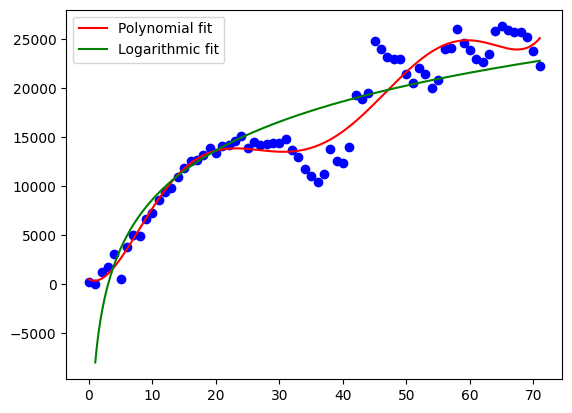

metabolites: 2.0


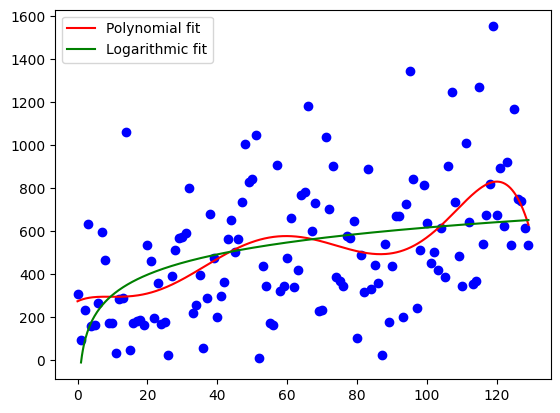

In [59]:
peak_df = get_peak_list(df, substrat=substrates[1], range=0.1).dropna()
for metabolite in range(len(metabolites)):
    metabolite_peak =get_peak_list(df, substrat=metabolites[metabolite], range=0.1).dropna()
    print(f'metabolites: {metabolites[metabolite]}')

    # Polynomial Regression
    def polynomial_regression(x, y, degree=3):
        coefficients = np.polyfit(x, y, degree)
        polynomial = np.poly1d(coefficients)
        x_new = np.linspace(x.min(), x.max(), 500)
        y_regression = polynomial(x_new)
        return x_new, y_regression
    
    # Logarithmic Regression
    def logarithmic_regression(x, y):
        # Filter out non-positive x values
        valid_indices = x > 0  # Only keep positive x values for the log transformation
        x = x[valid_indices]
        y = y[valid_indices]
        x_new = np.linspace(x.min(), x.max(), 500)
        # Apply logarithmic transformation to x for the logarithmic regression
        log_x = np.log(x)
        # Fit a linear model to log(x) vs y
        coefficients = np.polyfit(log_x, y, 1)  # Degree 1 for a linear fit in log space
        logarithmic_fit = np.poly1d(coefficients)
        y_log = logarithmic_fit(np.log(x_new))
        return x_new, y_log

    # Define the data points
    x = metabolite_peak.index
    y = metabolite_peak['y']

    x_poly, y_poly = polynomial_regression(x, y, degree=6)
    x_log, y_log = logarithmic_regression(x, y)




    # Plot the original data points and the regression line
    plt.plot(x, y, 'bo')           # Original data points
    plt.plot(x_poly, y_poly, 'r-', label=f'Polynomial fit')  # Regression line
    plt.plot(x_log, y_log, 'g-', label='Logarithmic fit')  # Regression line in original space
    plt.legend()
    plt.show()


Fit Logarithmic curve